<a href="https://colab.research.google.com/github/wanwanliang/ML_Projects/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()
os.chdir('drive/My Drive/ML')

# Prepare data from git

In [ ]:
! git clone https://github.com/wanwanliang/handson-ml2

Cloning into 'handson-ml2'...
remote: Enumerating objects: 2155, done.
remote: Total 2155 (delta 0), reused 0 (delta 0), pack-reused 2155
Receiving objects: 100% (2155/2155), 123.20 MiB | 14.34 MiB/s, done.
Resolving deltas: 100% (1297/1297), done.
Checking out files: 100% (81/81), done.


# Load Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Data Exploring

In [ ]:
os.chdir('/content/drive/My Drive/ML/handson/datasets/housing')
dt = pd.read_csv('housing.csv')

In [ ]:
print("Data dimension:", dt.shape)
dt.columns

Data dimension: (20640, 10)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Histogram

In [ ]:
dt.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
dt['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

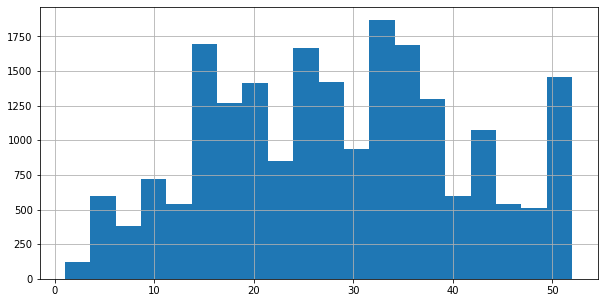

In [ ]:
dt['housing_median_age'].hist(bins = 20, figsize=(10,5))
plt.show()

<function matplotlib.pyplot.show>

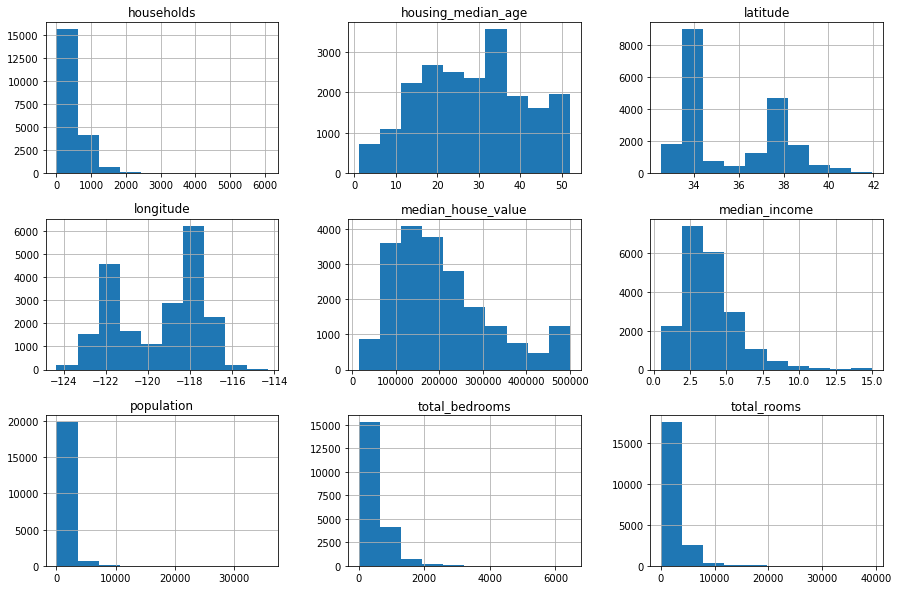

In [ ]:
dt.hist(figsize=(15,10))
plt.show

## Column statistics

In [ ]:
dt['total_rooms'].value_counts().head(5)

1527.0    18
1613.0    17
1582.0    17
2127.0    16
1703.0    15
Name: total_rooms, dtype: int64

In [ ]:
dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Check number of NaN values

In [ ]:
naid = pd.isnull(dt).any(1)
naid.head(5)
naid.value_counts()

False    20433
True       207
dtype: int64

In [ ]:
dtna = dt.isnull()
dtna.head(5)

print("# of NA by columns:")
print(dtna.sum(axis=0))

print("")
print("# of NA:")
print(dtna.sum(axis=0).value_counts())

# of NA by columns:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# of NA:
0      9
207    1
dtype: int64


In [ ]:
dt2 = dt
dt2 = dt.dropna()
print(dt.shape)
dt2.shape

(20640, 10)


(20433, 10)

In [ ]:
dt.isnull().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
dt.isnull().sum(axis=1).value_counts()

0        0
1        0
2        0
3        0
4        0
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Length: 20640, dtype: int64

# Data Visualization

## Scatter Plot

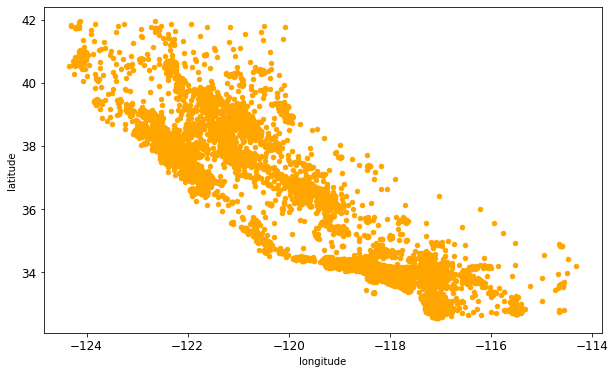

In [ ]:
dt.plot(kind='scatter', x='longitude', y='latitude', color = "orange", figsize=(10,6), fontsize=12)

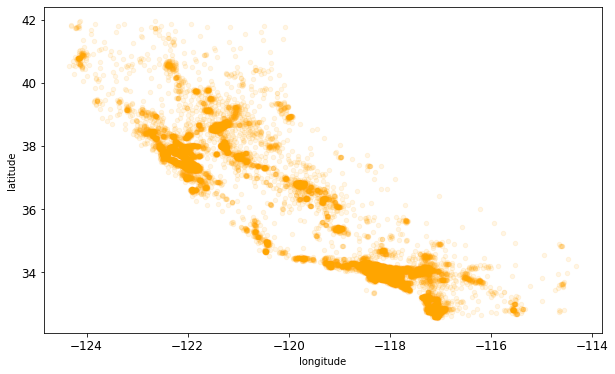

In [ ]:
dt.plot(kind="scatter", x='longitude', y='latitude', alpha=0.1, color="orange", figsize=(10,6),fontsize=12)

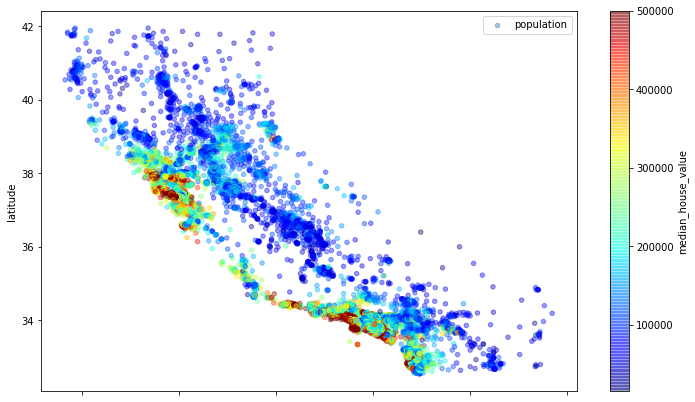

In [ ]:
dt.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, label='population',figsize=(12,7),colorbar=True, cmap=plt.get_cmap('jet'), c="median_house_value" )

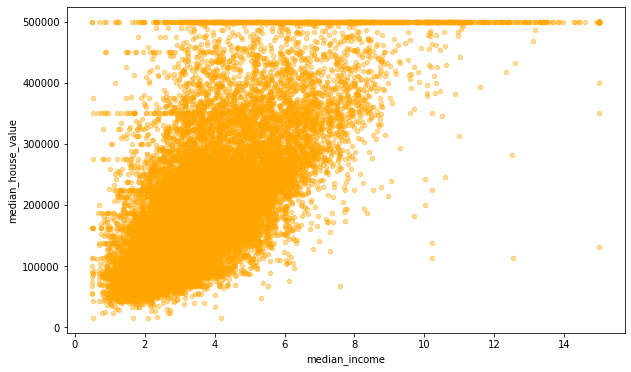

In [ ]:
dt.plot(kind="scatter", x='median_income', y='median_house_value',figsize=(10,6),color='orange',alpha=0.4)

## Pairwise Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff36b74ddd8>,
      dtype=object)

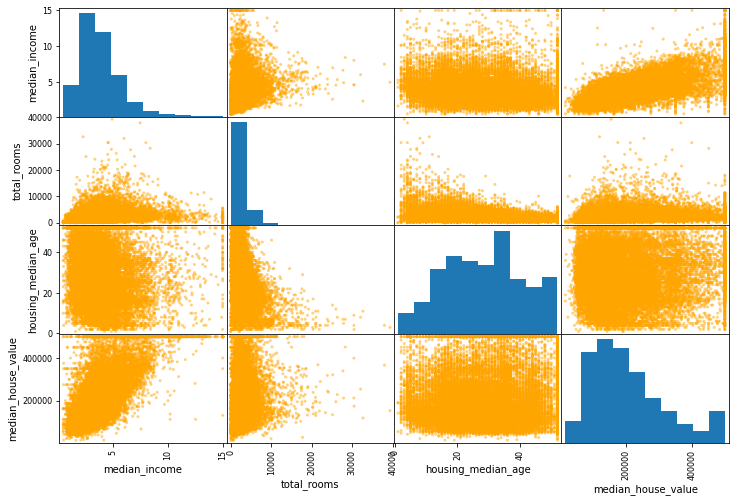

In [ ]:
from pandas.plotting import scatter_matrix
cols = ['median_income','total_rooms','housing_median_age','median_house_value']
scatter_matrix(dt[cols], figsize=(12,8), color="orange")

#Dataframe Subsetting

## first or last observations

In [ ]:
first100 = dt.head(n=100)
print(first100.shape)
first100 = dt[:100]
print(first100.shape)

tail100 = dt.tail(n=100)
print(tail100.shape)
print(tail100.head(3))
tail100 = dt[-100:]
print(tail100.shape)
print(tail100.head(3))

(100, 10)
(100, 10)
(100, 10)
       longitude  latitude  ...  median_house_value  ocean_proximity
20540    -121.72     38.54  ...            194300.0           INLAND
20541    -121.70     38.54  ...            226500.0           INLAND
20542    -121.75     38.55  ...            236200.0           INLAND

[3 rows x 10 columns]
(100, 10)
       longitude  latitude  ...  median_house_value  ocean_proximity
20540    -121.72     38.54  ...            194300.0           INLAND
20541    -121.70     38.54  ...            226500.0           INLAND
20542    -121.75     38.55  ...            236200.0           INLAND

[3 rows x 10 columns]


##Select certain columns

In [ ]:
cols = ['median_income','total_rooms','housing_median_age','median_house_value']

dt_sub = dt[cols]
dt_sub.head(5)

,median_income,total_rooms,housing_median_age,median_house_value
0,8.3252,880.0,41.0,452600.0
1,8.3014,7099.0,21.0,358500.0
2,7.2574,1467.0,52.0,352100.0
3,5.6431,1274.0,52.0,341300.0
4,3.8462,1627.0,52.0,342200.0


In [ ]:
dt_sub = dt.iloc[1:100, [2,3,4]]
print(dt_sub.head(3))

dt_sub = dt.iloc[1:100, ]
dt_sub.head(3)

   housing_median_age  total_rooms  total_bedrooms
1                21.0       7099.0          1106.0
2                52.0       1467.0           190.0
3                52.0       1274.0           235.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [ ]:
dt_sub = dt[(dt.housing_median_age<=30) & (dt.median_income>=7)]
dt_sub.shape

(734, 10)

In [ ]:
dt['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
dt_sub = dt[dt.ocean_proximity.isin(['NEAR BAY','NEAR OCEAN'])]
print(dt_sub.shape)
dt_sub['ocean_proximity'].value_counts()

(4948, 10)


NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

## Select based on attributes

In [ ]:
dt_sub = dt[dt.total_rooms>1000]
dt_sub.shape

(18312, 10)

# Data Preprocessing

## Fill NaN values

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline 

In [ ]:
imputer = SimpleImputer(strategy='median')
dt2 = dt.drop('ocean_proximity',axis = 1)
dt2.shape

(20640, 9)

In [ ]:
imputer.fit(dt2)
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [ ]:
dt3 = imputer.transform(dt2)

## Scale Data

In [ ]:
scaler = StandardScaler()
scaler.fit(dt3)
scaler.mean_

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.36838857e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05])

In [ ]:
dt3 = scaler.transform(dt3)

In [ ]:
dt3.shape

(20640, 9)

In [ ]:
dt3 = pd.DataFrame(dt3, columns = dt2.columns, index = dt2.index)
dt3.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900


## Encoder

In [ ]:
dt_ca = OneHotEncoder().fit_transform(dt[['ocean_proximity']])
dt_ca

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [ ]:
dt_ca = dt_ca.toarray()
print(dt_ca.shape)
dt_ca

(20640, 5)

## Data Pipeline for preprocessing

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())                    
])

In [ ]:
dt_prepro = num_pipeline.fit_transform(dt2)

In [ ]:
dt_prepro = pd.DataFrame(dt4,columns = dt2.columns, index = dt2.index)

In [ ]:
dt_prepro.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156


In [ ]:
from sklearn.compose import ColumnTransformer

num_x = list(dt.drop('ocean_proximity', axis=1))
cat_x = ['ocean_proximity']
num_x

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_x),
    ('cat', OneHotEncoder(),cat_x)                                     
])

In [ ]:
dta = preprocess_pipeline.fit_transform(dt)
dta.shape

(20640, 14)

In [ ]:
dta = pd.DataFrame(dta, index = dt.index)
dta.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,0.0,1.0,0.0


In [ ]:
dta.isnull().sum(axis=0)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64